In [1]:
import pandas as pd

In [79]:
df_rfm = pd.read_csv('df_rfm.csv')

In [82]:
df_filtered = pd.read_csv('df_filtered.csv')

In [85]:
df_annulation = pd.read_csv('df_annulation.csv')

In [88]:
df_grossiste = pd.read_csv('df_grossiste.csv')

In [3]:
df_rfm.columns

Index(['Unnamed: 0', 'Customer ID', 'NombreCommandes', 'NombreArticles',
       'DateDerniereCommande', 'MontantTotal', 'CommandesAnnulees',
       'NombreCommandesNonAnnulees', 'PanierMoyen', 'Recency',
       'NombreArticlesMoyenParCommande', 'Country'],
      dtype='object')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

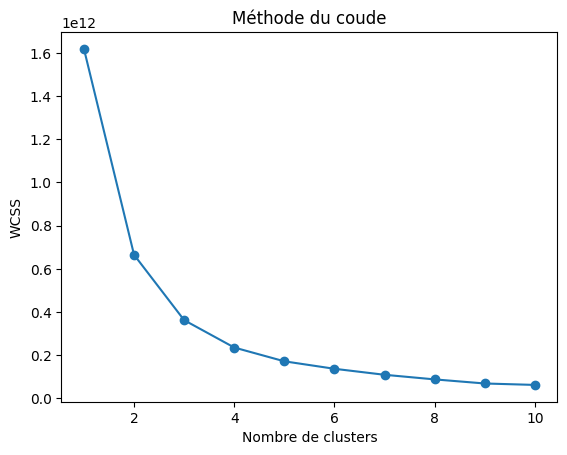

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler


variables = ['NombreCommandesNonAnnulees','NombreArticles','MontantTotal','Recency','CommandesAnnulees', 'PanierMoyen','NombreArticlesMoyenParCommande']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


In [97]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Sélectionner les variables pour la segmentation
variables = ['NombreCommandes','MontantTotal_y','Recency']
# Préparer les données et effectuer la normalisation
X = df_filtered[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choix du nombre de clusters (k)
k = 3

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Ajouter les informations de segmentation au dataframe d'origine
df_filtered['Segment'] = kmeans.labels_

# Analyser les caractéristiques des clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)
display(df_cluster_centers)


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NombreCommandes,MontantTotal_y,Recency
0,7.657800,2783.485869,61.875866
1,2.172928,631.272563,451.878024
2,181.416667,94024.672500,29.250000


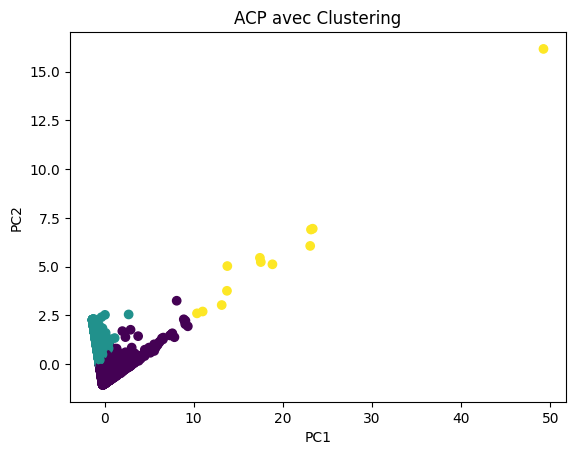

In [98]:

from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(X_scaled)


# Scatter plot des composantes principales avec une couleur pour chaque cluster
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec Clustering')
plt.show()
